In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Loading the dataset
data = pd.read_csv('Dataset Churn prediction 04-08 - data60.csv')
data.head()

,service_provider_id,leads,% First Choice,% Hired,answered_by_email,answered_by_phone,reclaimed_percent,reclaimed_denied_percent,response_rate_percent,response_time,...,phone_calls_activated,top_pro,website_clicks_activated,widget_active,Lifetime,Avg_position,total_invoices,% Charged back,Limit reached,has_churned
0,152,21,71.428571,14.285714,83.29,16.57,24.285714,42.857143,100.000000,21.132857,...,1,1,1,0,28,1.825743,30,0.0,1,0
1,184,10,60.000000,20.000000,100.00,0.00,0.000000,0.000000,100.000000,0.000000,...,1,1,1,0,12,NaN,2,0.0,0,1
2,197,40,22.500000,2.500000,16.57,83.29,0.000000,0.000000,55.969388,7.692857,...,1,0,0,0,32,2.263003,34,0.0,15,0
3,368,54,66.666667,18.518519,1.29,98.57,0.000000,0.000000,100.000000,11.044286,...,1,1,1,1,16,1.907409,16,0.0,0,0
4,436,80,5.000000,6.250000,0.00,100.00,0.000000,0.000000,91.076067,24.300000,...,1,1,1,0,27,4.066283,28,0.0,1,0


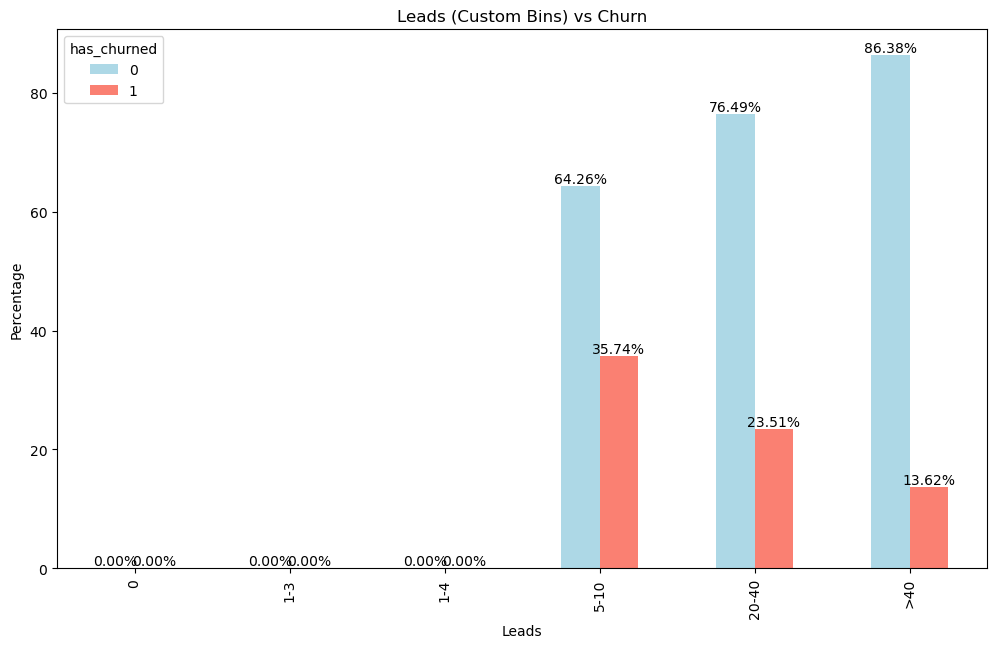

In [11]:
# Defining custom bins based on the provided intervals
bins = [-np.inf, 0, 3, 4, 10, 40, np.inf]
labels = ['0', '1-3', '1-4', '5-10', '20-40', '>40']

# Binning the 'leads' data based on the custom bins
data['leads_custom_binned'] = pd.cut(data['leads'], bins=bins, labels=labels, include_lowest=True, right=True)

# Grouping by the custom bins and 'has_churned' column
grouped_custom_bins = data.groupby(['leads_custom_binned', 'has_churned']).size().reset_index(name='counts')

# Creating a pivot table for visualization
pivot_grouped_custom_bins = grouped_custom_bins.pivot(index='leads_custom_binned', columns='has_churned', values='counts')
pivot_grouped_custom_bins.fillna(0, inplace=True)

# Calculating percentages for visualization
total_counts_custom_bins = pivot_grouped_custom_bins.sum(axis=1)
pivot_grouped_custom_bins_percentage = (pivot_grouped_custom_bins.divide(total_counts_custom_bins, axis=0) * 100)

colors = ['lightblue', 'salmon']

# Plotting
ax = pivot_grouped_custom_bins_percentage.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Leads')
plt.ylabel('Percentage')
plt.title('Leads (Custom Bins) vs Churn')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 0.5), ha='center')

plt.show()

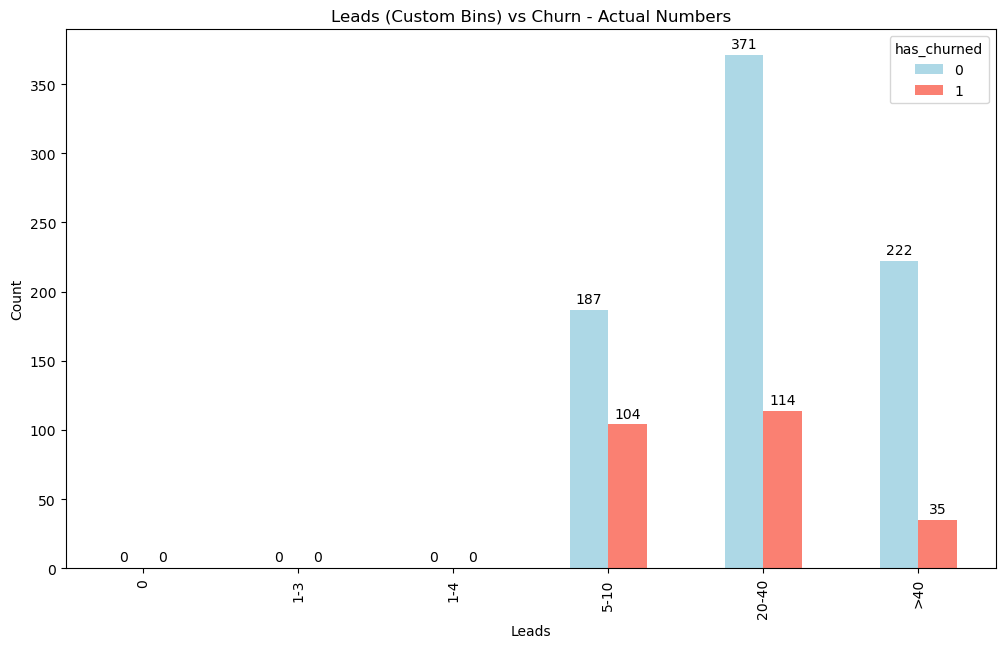

In [12]:
# Plotting the actual numbers
colors = ['lightblue', 'salmon']
ax = pivot_grouped_custom_bins.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Leads')
plt.ylabel('Count')
plt.title('Leads (Custom Bins) vs Churn - Actual Numbers')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 5), ha='center')

plt.show()

#### % Hired ####

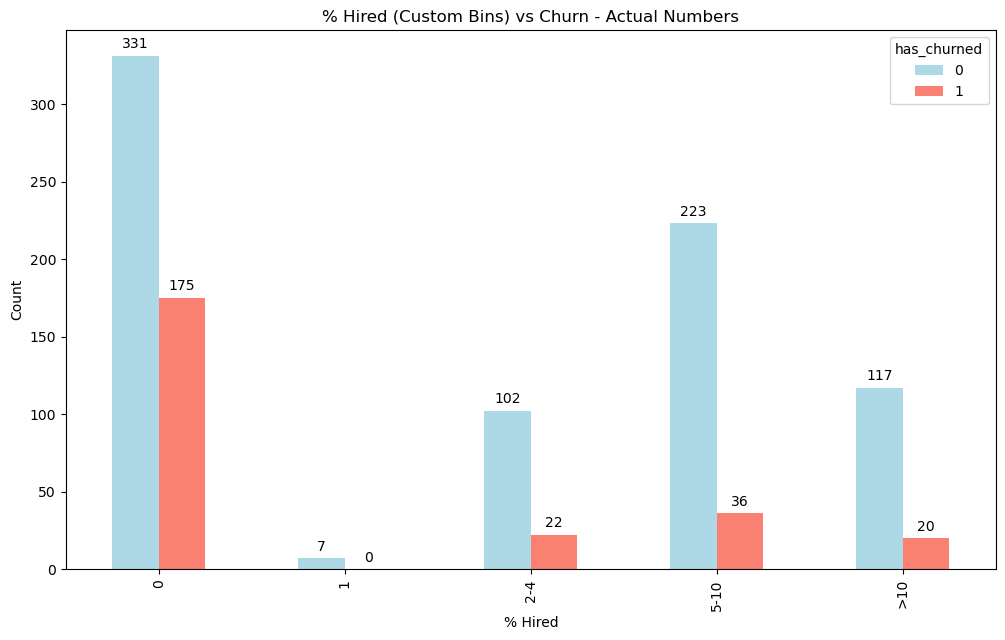

In [13]:
# Defining custom bins for '% Hired' based on the provided intervals
bins_hired = [-np.inf, 0, 1, 4, 10, np.inf]
labels_hired = ['0', '1', '2-4', '5-10', '>10']

# Binning the '% Hired' data based on the custom bins
data['hired_custom_binned'] = pd.cut(data['% Hired'], bins=bins_hired, labels=labels_hired, include_lowest=True, right=True)

# Grouping by the custom bins and 'has_churned' column
grouped_hired_custom_bins = data.groupby(['hired_custom_binned', 'has_churned']).size().reset_index(name='counts')

# Creating a pivot table for visualization
pivot_grouped_hired_custom_bins = grouped_hired_custom_bins.pivot(index='hired_custom_binned', columns='has_churned', values='counts')
pivot_grouped_hired_custom_bins.fillna(0, inplace=True)

# Plotting the actual numbers with specified colors
ax = pivot_grouped_hired_custom_bins.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('% Hired')
plt.ylabel('Count')
plt.title('% Hired (Custom Bins) vs Churn - Actual Numbers')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 5), ha='center')

plt.show()

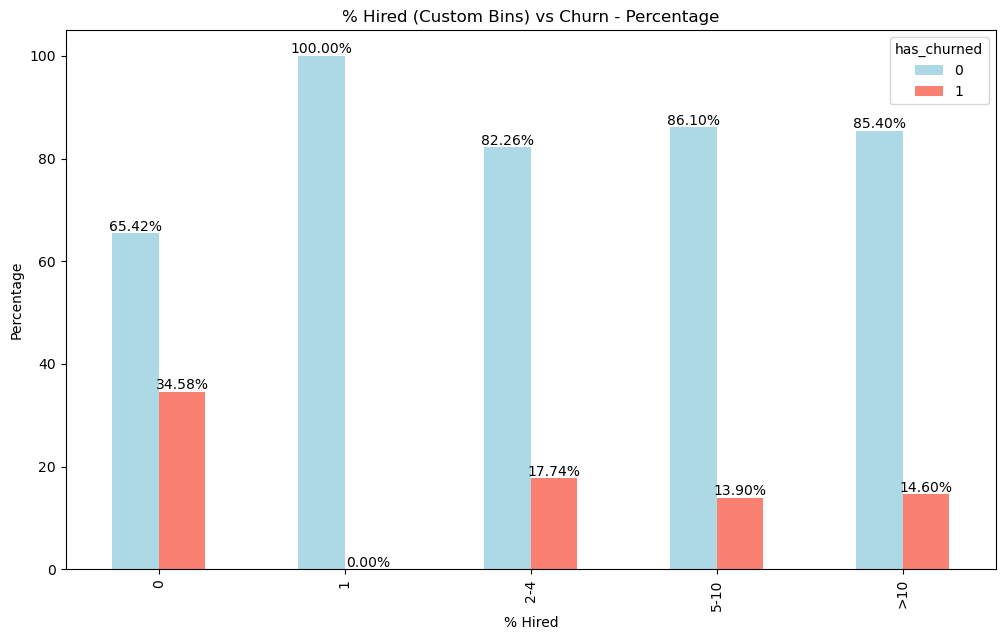

In [14]:
# Calculating percentages for visualization
total_counts_hired_custom_bins = pivot_grouped_hired_custom_bins.sum(axis=1)
pivot_grouped_hired_custom_bins_percentage = (pivot_grouped_hired_custom_bins.divide(total_counts_hired_custom_bins, axis=0) * 100)

# Plotting the percentages with specified colors
ax = pivot_grouped_hired_custom_bins_percentage.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('% Hired')
plt.ylabel('Percentage')
plt.title('% Hired (Custom Bins) vs Churn - Percentage')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 0.5), ha='center')

plt.show()

#### Answered by Email ####

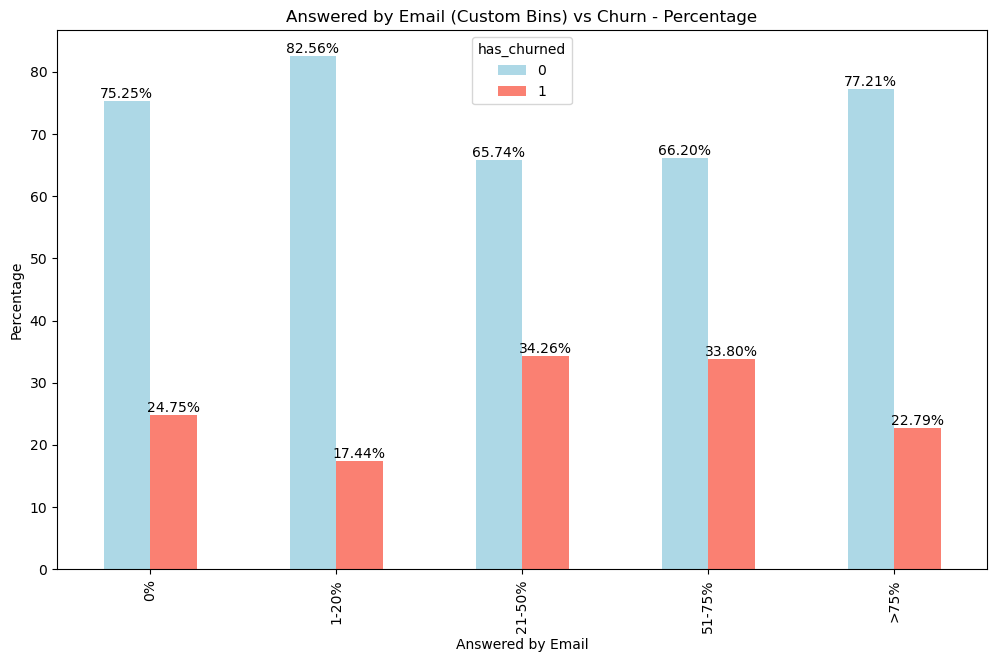

In [15]:
# Defining custom bins for 'answered_by_email' based on the provided intervals
bins_email = [-np.inf, 0, 20, 50, 75, np.inf]
labels_email = ['0%', '1-20%', '21-50%', '51-75%', '>75%']

# Binning the 'answered_by_email' data based on the custom bins
data['email_custom_binned'] = pd.cut(data['answered_by_email'], bins=bins_email, labels=labels_email, include_lowest=True, right=True)

# Grouping by the custom bins and 'has_churned' column
grouped_email_custom_bins = data.groupby(['email_custom_binned', 'has_churned']).size().reset_index(name='counts')

# Creating a pivot table for visualization
pivot_grouped_email_custom_bins = grouped_email_custom_bins.pivot(index='email_custom_binned', columns='has_churned', values='counts')
pivot_grouped_email_custom_bins.fillna(0, inplace=True)

# Calculating percentages for visualization
total_counts_email_custom_bins = pivot_grouped_email_custom_bins.sum(axis=1)
pivot_grouped_email_custom_bins_percentage = (pivot_grouped_email_custom_bins.divide(total_counts_email_custom_bins, axis=0) * 100)

# Plotting the percentages with specified colors
ax = pivot_grouped_email_custom_bins_percentage.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Answered by Email')
plt.ylabel('Percentage')
plt.title('Answered by Email (Custom Bins) vs Churn - Percentage')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 0.5), ha='center')

plt.show()

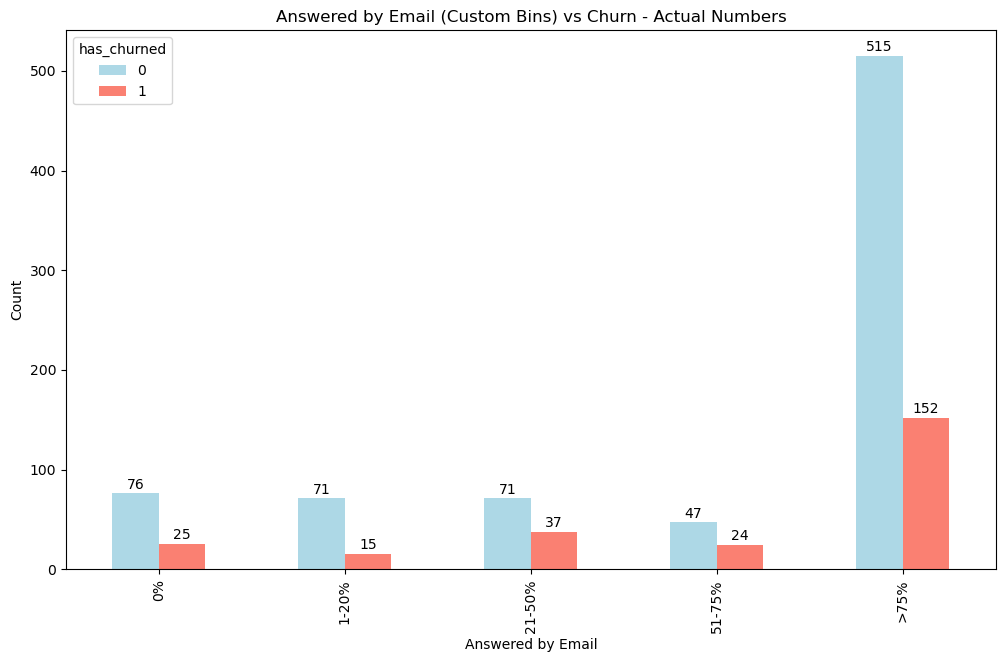

In [16]:
# Plotting the actual numbers for 'Answered by Email' with specified colors
ax = pivot_grouped_email_custom_bins.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Answered by Email')
plt.ylabel('Count')
plt.title('Answered by Email (Custom Bins) vs Churn - Actual Numbers')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 5), ha='center')

plt.show()

#### Answered by phone ####

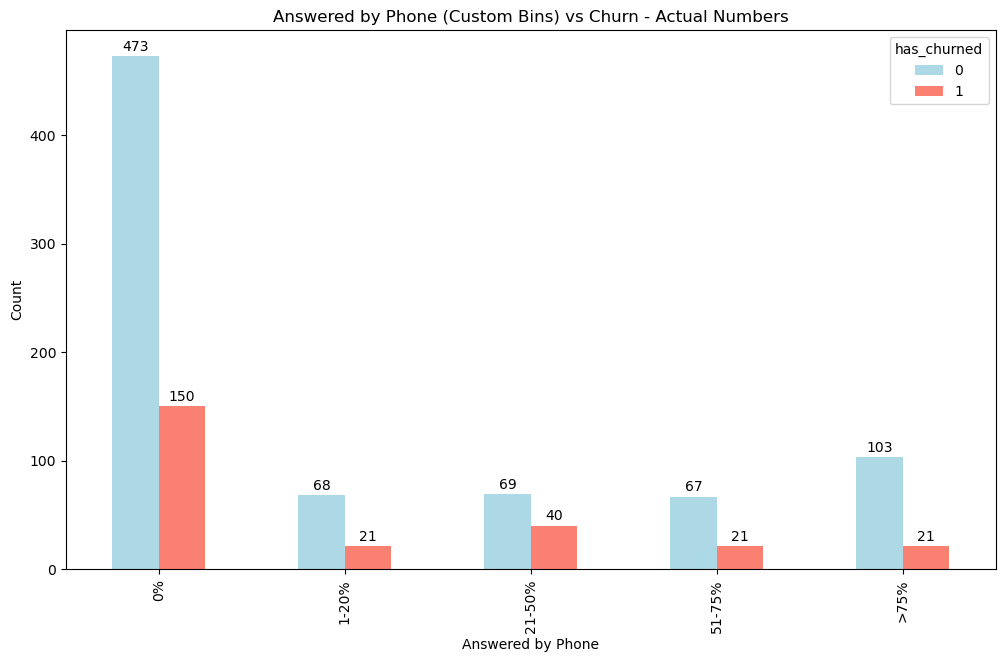

In [17]:
# Defining custom bins for 'answered_by_phone' based on the provided intervals
bins_phone = [-np.inf, 0, 20, 50, 75, np.inf]
labels_phone = ['0%', '1-20%', '21-50%', '51-75%', '>75%']

# Binning the 'answered_by_phone' data based on the custom bins
data['phone_custom_binned'] = pd.cut(data['answered_by_phone'], bins=bins_phone, labels=labels_phone, include_lowest=True, right=True)

# Grouping by the custom bins and 'has_churned' column
grouped_phone_custom_bins = data.groupby(['phone_custom_binned', 'has_churned']).size().reset_index(name='counts')

# Creating a pivot table for visualization
pivot_grouped_phone_custom_bins = grouped_phone_custom_bins.pivot(index='phone_custom_binned', columns='has_churned', values='counts')
pivot_grouped_phone_custom_bins.fillna(0, inplace=True)

# Plotting the actual numbers for 'Answered by Phone' with specified colors
ax = pivot_grouped_phone_custom_bins.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Answered by Phone')
plt.ylabel('Count')
plt.title('Answered by Phone (Custom Bins) vs Churn - Actual Numbers')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 5), ha='center')

plt.show()

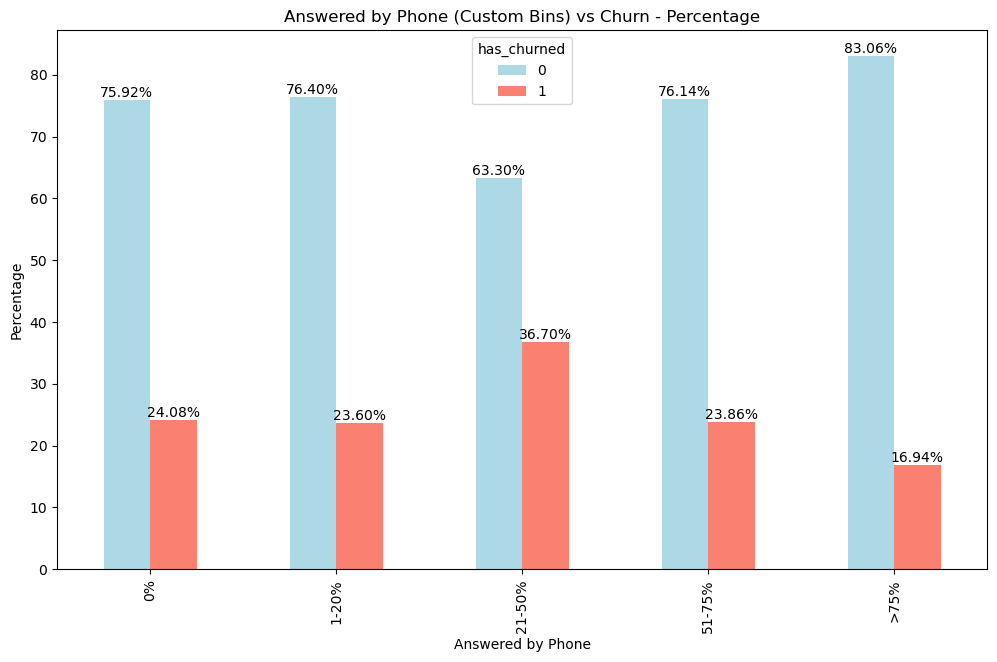

In [18]:
# Calculating percentages for visualization for 'Answered by Phone'
total_counts_phone_custom_bins = pivot_grouped_phone_custom_bins.sum(axis=1)
pivot_grouped_phone_custom_bins_percentage = (pivot_grouped_phone_custom_bins.divide(total_counts_phone_custom_bins, axis=0) * 100)

# Plotting the percentages with specified colors
ax = pivot_grouped_phone_custom_bins_percentage.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Answered by Phone')
plt.ylabel('Percentage')
plt.title('Answered by Phone (Custom Bins) vs Churn - Percentage')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 0.5), ha='center')

plt.show()

#### Reclaimed Percentage ####

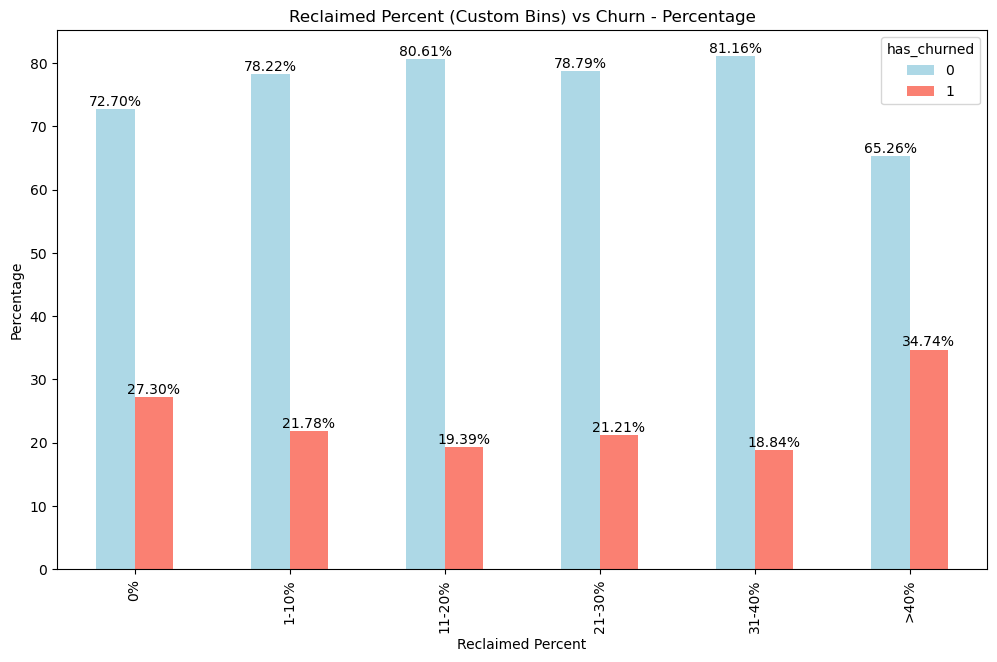

In [20]:
# Defining custom bins for 'reclaimed_percent' based on the provided intervals
bins_reclaimed = [-np.inf, 0, 10, 20, 30, 40, np.inf]
labels_reclaimed = ['0%', '1-10%', '11-20%', '21-30%', '31-40%', '>40%']

# Binning the 'reclaimed_percent' data based on the custom bins
data['reclaimed_custom_binned'] = pd.cut(data['reclaimed_percent'], bins=bins_reclaimed, labels=labels_reclaimed, include_lowest=True, right=True)

# Grouping by the custom bins and 'has_churned' column
grouped_reclaimed_custom_bins = data.groupby(['reclaimed_custom_binned', 'has_churned']).size().reset_index(name='counts')

# Creating a pivot table for visualization
pivot_grouped_reclaimed_custom_bins = grouped_reclaimed_custom_bins.pivot(index='reclaimed_custom_binned', columns='has_churned', values='counts')
pivot_grouped_reclaimed_custom_bins.fillna(0, inplace=True)

# Calculating percentages for visualization
total_counts_reclaimed_custom_bins = pivot_grouped_reclaimed_custom_bins.sum(axis=1)
pivot_grouped_reclaimed_custom_bins_percentage = (pivot_grouped_reclaimed_custom_bins.divide(total_counts_reclaimed_custom_bins, axis=0) * 100)

# Plotting the percentages with specified colors
ax = pivot_grouped_reclaimed_custom_bins_percentage.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Reclaimed Percent')
plt.ylabel('Percentage')
plt.title('Reclaimed Percent (Custom Bins) vs Churn - Percentage')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 0.5), ha='center')

plt.show()

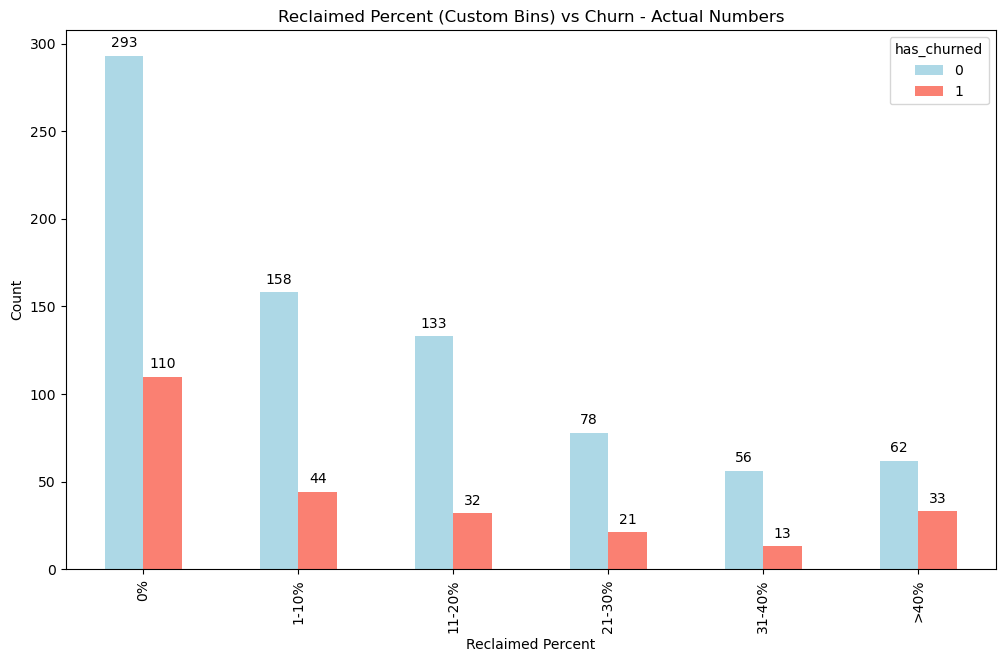

In [21]:
# Plotting the actual numbers for 'Reclaimed Percent' with specified colors
ax = pivot_grouped_reclaimed_custom_bins.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Reclaimed Percent')
plt.ylabel('Count')
plt.title('Reclaimed Percent (Custom Bins) vs Churn - Actual Numbers')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 5), ha='center')

plt.show()

#### Reclaimed Denied Percent ####

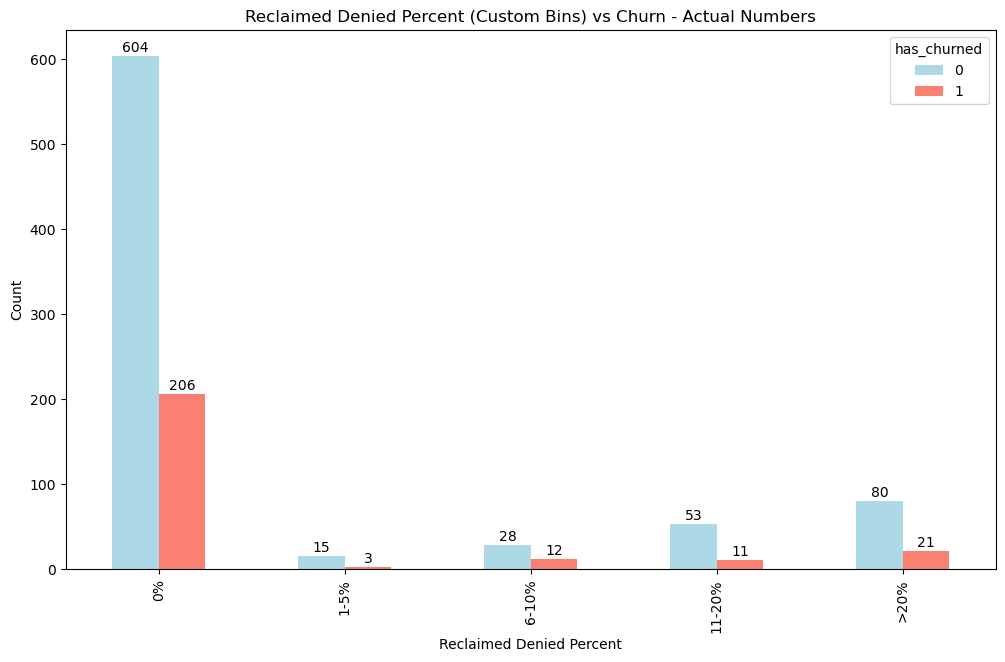

In [22]:
# Defining custom bins for 'reclaimed_denied_percent' based on the provided intervals
bins_denied = [-np.inf, 0, 5, 10, 20, np.inf]
labels_denied = ['0%', '1-5%', '6-10%', '11-20%', '>20%']

# Binning the 'reclaimed_denied_percent' data based on the custom bins
data['denied_custom_binned'] = pd.cut(data['reclaimed_denied_percent'], bins=bins_denied, labels=labels_denied, include_lowest=True, right=True)

# Grouping by the custom bins and 'has_churned' column
grouped_denied_custom_bins = data.groupby(['denied_custom_binned', 'has_churned']).size().reset_index(name='counts')

# Creating a pivot table for visualization
pivot_grouped_denied_custom_bins = grouped_denied_custom_bins.pivot(index='denied_custom_binned', columns='has_churned', values='counts')
pivot_grouped_denied_custom_bins.fillna(0, inplace=True)

# Plotting the actual numbers for 'Reclaimed Denied Percent' with specified colors
ax = pivot_grouped_denied_custom_bins.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Reclaimed Denied Percent')
plt.ylabel('Count')
plt.title('Reclaimed Denied Percent (Custom Bins) vs Churn - Actual Numbers')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height + 5), ha='center')

plt.show()

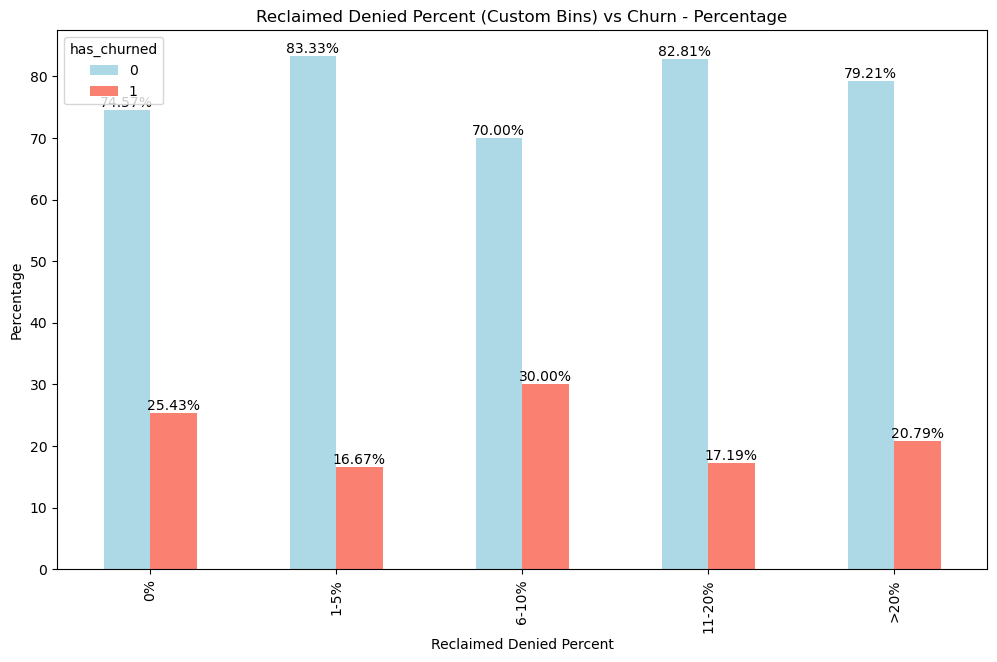

In [23]:
##Test


# Calculating percentages for visualization for 'Reclaimed Denied Percent'
total_counts_denied_custom_bins = pivot_grouped_denied_custom_bins.sum(axis=1)
pivot_grouped_denied_custom_bins_percentage = (pivot_grouped_denied_custom_bins.divide(total_counts_denied_custom_bins, axis=0) * 100)

# Plotting the percentages with specified colors
ax = pivot_grouped_denied_custom_bins_percentage.plot(kind='bar', stacked=False, figsize=(12,7), color=colors)
plt.xlabel('Reclaimed Denied Percent')
plt.ylabel('Percentage')
plt.title('Reclaimed Denied Percent (Custom Bins) vs Churn - Percentage')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 0.5), ha='center')

plt.show()